In [2]:
import pandas as pd
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data\range for 5 pressure.xlsx', header=0, index_col=0)
print(series)

          Pressure
Time              
12:30:17     5.004
12:30:18     5.009
12:30:19     5.011
12:30:20     5.012
12:30:21     5.015
...            ...
13:59:56     5.027
13:59:57     5.027
13:59:58     5.028
13:59:59     5.029
14:00:00     5.030

[4849 rows x 1 columns]


In [2]:
series.describe()

,Pressure
count,4849.000000
mean,5.045026
std,0.013702
min,5.004000
25%,5.033000
50%,5.043000
75%,5.056000
max,5.074000


          Pressure
Time              
12:30:17     5.004
12:30:18     5.009
12:30:19     5.011
12:30:20     5.012
12:30:21     5.015


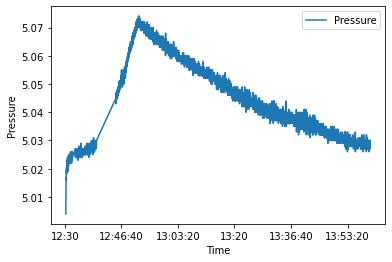

In [3]:
from matplotlib import pyplot
print(series.head())
series.plot()
pyplot.xlabel('Time')
pyplot.ylabel('Pressure')
pyplot.show()

In [4]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values=DataFrame(series.values)
dataframe=concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.991485
t+1  0.991485  1.000000


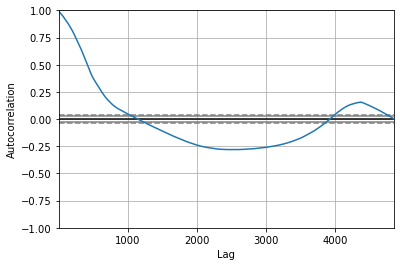

In [5]:
from pandas.plotting import autocorrelation_plot
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

Text(0.5, 0, 'Lag')

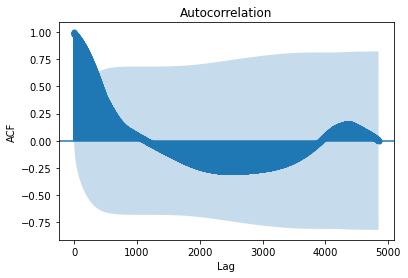

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
acf_plot = plot_acf( series,lags=4847)
pyplot.ylabel('ACF')
pyplot.xlabel('Lag')

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.02212659  0.29124112  0.19135019  0.1813994   0.11404335  0.10580236
  0.10182376  0.03983504 -0.00816689  0.01146069 -0.03315618]
predicted=5.056885, expected=5.059000
predicted=5.056785, expected=5.055000
predicted=5.056820, expected=5.058000
predicted=5.056742, expected=5.056000
predicted=5.056777, expected=5.056000
predicted=5.056630, expected=5.055000
predicted=5.056803, expected=5.056000
predicted=5.056762, expected=5.056000
predicted=5.056811, expected=5.056000
predicted=5.056840, expected=5.056000
predicted=5.056824, expected=5.055000
predicted=5.056838, expected=5.055000
predicted=5.056855, expected=5.057000
predicted=5.056875, expected=5.055000
predicted=5.056887, expected=5.054000
predicted=5.056910, expected=5.056000
predicted=5.056919, expected=5.054000
predicted=5.056935, expected=5.055000
predicted=5.056950, expected=5.055000
predicted=5.056964, expected=5.057000
predicted=5.056980, expected=5.056000
predicted=5.056995, expected=5.056000
predicted=5.057

predicted=5.065498, expected=5.041000
predicted=5.065500, expected=5.039000
predicted=5.065502, expected=5.041000
predicted=5.065503, expected=5.040000
predicted=5.065505, expected=5.040000
predicted=5.065507, expected=5.039000
predicted=5.065508, expected=5.040000
predicted=5.065510, expected=5.041000
predicted=5.065512, expected=5.039000
predicted=5.065513, expected=5.040000
predicted=5.065515, expected=5.039000
predicted=5.065517, expected=5.039000
predicted=5.065518, expected=5.040000
predicted=5.065520, expected=5.041000
predicted=5.065522, expected=5.039000
predicted=5.065523, expected=5.041000
predicted=5.065525, expected=5.040000
predicted=5.065527, expected=5.039000
predicted=5.065528, expected=5.037000
predicted=5.065530, expected=5.037000
predicted=5.065532, expected=5.041000
predicted=5.065533, expected=5.039000
predicted=5.065535, expected=5.038000
predicted=5.065536, expected=5.043000
predicted=5.065538, expected=5.037000
predicted=5.065540, expected=5.042000
predicted=5.

predicted=5.066478, expected=5.028000
predicted=5.066478, expected=5.027000
predicted=5.066479, expected=5.030000
predicted=5.066479, expected=5.029000
predicted=5.066479, expected=5.030000
predicted=5.066479, expected=5.029000
predicted=5.066479, expected=5.029000
predicted=5.066479, expected=5.029000
predicted=5.066480, expected=5.027000
predicted=5.066480, expected=5.030000
predicted=5.066480, expected=5.029000
predicted=5.066480, expected=5.029000
predicted=5.066480, expected=5.027000
predicted=5.066480, expected=5.029000
predicted=5.066481, expected=5.029000
predicted=5.066481, expected=5.029000
predicted=5.066481, expected=5.029000
predicted=5.066481, expected=5.026000
predicted=5.066481, expected=5.032000
predicted=5.066481, expected=5.027000
predicted=5.066482, expected=5.028000
predicted=5.066482, expected=5.030000
predicted=5.066482, expected=5.028000
predicted=5.066482, expected=5.030000
predicted=5.066482, expected=5.031000
predicted=5.066482, expected=5.027000
predicted=5.

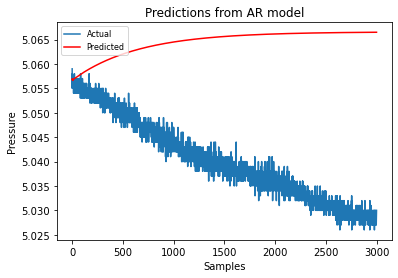

In [7]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx', header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]
# train autoregression
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
mape = 100*(mean_absolute_percentage_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.02212659  0.29124112  0.19135019  0.1813994   0.11404335  0.10580236
  0.10182376  0.03983504 -0.00816689  0.01146069 -0.03315618]
predicted=5.056885, expected=5.059000
predicted=5.057401, expected=5.055000
predicted=5.056705, expected=5.058000
predicted=5.057128, expected=5.056000
predicted=5.056704, expected=5.056000
predicted=5.056497, expected=5.055000
predicted=5.056206, expected=5.056000
predicted=5.056018, expected=5.056000
predicted=5.056004, expected=5.056000
predicted=5.056054, expected=5.056000
predicted=5.055813, expected=5.055000
predicted=5.055709, expected=5.055000
predicted=5.055457, expected=5.057000
predicted=5.055973, expected=5.055000
predicted=5.055639, expected=5.054000
predicted=5.055267, expected=5.056000
predicted=5.055389, expected=5.054000
predicted=5.054951, expected=5.055000
predicted=5.055109, expected=5.055000
predicted=5.054924, expected=5.057000
predicted=5.055507, expected=5.056000
predicted=5.055704, expected=5.056000
predicted=5.055

predicted=5.041841, expected=5.041000
predicted=5.041750, expected=5.041000
predicted=5.041604, expected=5.042000
predicted=5.041647, expected=5.042000
predicted=5.041806, expected=5.040000
predicted=5.041362, expected=5.042000
predicted=5.041509, expected=5.042000
predicted=5.041650, expected=5.041000
predicted=5.041601, expected=5.041000
predicted=5.041377, expected=5.041000
predicted=5.041261, expected=5.041000
predicted=5.041283, expected=5.043000
predicted=5.041822, expected=5.043000
predicted=5.042064, expected=5.041000
predicted=5.041894, expected=5.040000
predicted=5.041390, expected=5.043000
predicted=5.041909, expected=5.042000
predicted=5.042020, expected=5.041000
predicted=5.041835, expected=5.044000
predicted=5.042352, expected=5.042000
predicted=5.042207, expected=5.041000
predicted=5.042074, expected=5.040000
predicted=5.041467, expected=5.043000
predicted=5.041946, expected=5.043000
predicted=5.042355, expected=5.041000
predicted=5.041910, expected=5.040000
predicted=5.

predicted=5.032453, expected=5.032000
predicted=5.032616, expected=5.030000
predicted=5.031713, expected=5.031000
predicted=5.031648, expected=5.030000
predicted=5.031120, expected=5.031000
predicted=5.031086, expected=5.033000
predicted=5.031521, expected=5.032000
predicted=5.031635, expected=5.032000
predicted=5.031792, expected=5.031000
predicted=5.031641, expected=5.032000
predicted=5.031869, expected=5.031000
predicted=5.031812, expected=5.031000
predicted=5.031613, expected=5.033000
predicted=5.032010, expected=5.033000
predicted=5.032281, expected=5.035000
predicted=5.033105, expected=5.030000
predicted=5.032239, expected=5.033000
predicted=5.032671, expected=5.030000
predicted=5.031948, expected=5.032000
predicted=5.032177, expected=5.033000
predicted=5.032341, expected=5.033000
predicted=5.032464, expected=5.031000
predicted=5.031997, expected=5.031000
predicted=5.031818, expected=5.032000
predicted=5.031788, expected=5.032000
predicted=5.032157, expected=5.033000
predicted=5.

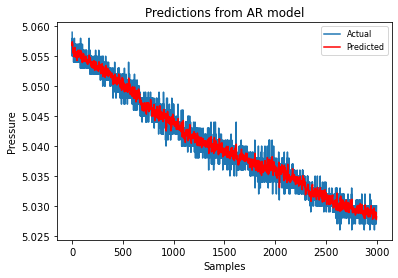

MSE=0.000002
R2=0.967066
Test RMSE: 0.001474
Test MAE: 0.001171
Test MAPE: 0.000232


In [22]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error,r2_score, mean_absolute_percentage_error
import numpy as np

from math import sqrt
# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx', header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()
MSE = np.square(np.subtract(test,predictions)).mean()
R2 = r2_score(test,predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape= mean_absolute_percentage_error(test, predictions)
print('MSE=%.6f'%MSE)
print('R2=%.6f'%R2)
print('Test RMSE: %.6f' % rmse)
print('Test MAE: %.6f' % mae)
print('Test MAPE: %.6f' % mape)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score, adjusted_rand_score
import numpy as np
mse = mean_squared_error(test,predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test,predictions)
#calculate sse
sse = np.sum((predictions - test)**2)
print('SSE=',sse)
print('MSE=', mse)
print('RMSE=', rmse)
print('R2 SCORE=', r2)
#calculate r-squared
r2 = 1 - np.sum((predictions - test)**2) / np.sum((test - np.mean(test))**2)
N=test.shape[0]
p=3
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

SSE= 0.006521688559463804
MSE= 2.1738961864879346e-06
RMSE= 0.0014744138450543437
R2 SCORE= 0.9670659646878884
Adjusted-R2 :  0.9670329866819016


In [9]:
# forecast residual forecast error
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
series = pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('residual error=%f' % (pred_error - error))

residual error=-0.000471
residual error=0.002519
residual error=-0.001650
residual error=0.001487
residual error=0.000161
residual error=-0.002082
residual error=-0.000626
residual error=0.000770
residual error=0.000455
residual error=0.001702
residual error=-0.000948
residual error=0.001315
residual error=-0.000076
residual error=-0.000968
residual error=0.001126
residual error=-0.002083
residual error=0.000361
residual error=-0.003554
residual error=0.000987
residual error=0.002962
residual error=0.002371
residual error=0.002947
residual error=-0.000640
residual error=-0.002773
residual error=-0.001120
residual error=-0.000193
residual error=-0.000965
residual error=0.003247
residual error=-0.001160
residual error=0.003095
residual error=-0.000647
residual error=0.000296
residual error=-0.000867
residual error=-0.001673
residual error=-0.000279
residual error=0.000025
residual error=0.001811
residual error=0.000755
residual error=-0.001708
residual error=0.001783
residual error=0.001

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [16]:
data = pd.read_excel(r"C:\Users\Ronny\Desktop\2022\Reports\residualerror.xlsx")
data

,residual
0,-0.000471
1,0.002519
2,-0.001650
3,0.001487
4,0.000161
...,...
1644,0.001136
1645,0.000916
1646,-0.000170
1647,-0.001199


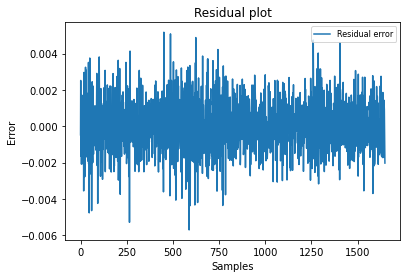

In [20]:
# plot results
pyplot.title('Residual plot')
pyplot.plot(data.residual, label='Residual error')
pyplot.xlabel('Samples')
pyplot.ylabel('Error')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()

In [ ]:
# plot results
residuals = pred_error - error
residuals

In [ ]:
print(model_fit.summary())

In [ ]:
import seaborn as sns
ax1 = sns.distplot(train,hist=False, label="Actual value", color='b')

sns.distplot(predictions,hist=False, label="Fitted values", color='r', ax=ax1)

In [ ]:
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx', header=0, index_col=0)
series.plot(kind='kde')
pyplot.xlabel('Pressure')
pyplot.show()

In [ ]:
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\range for 5 pressure.xlsx')
series.head()
